In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

c:\Users\Ashu\Desktop\DE\CU\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

df = pd.read_csv(r"../dataset/data.csv")

In [3]:
df.head()

,Disease,Hindi Name,Marathi Name,Symptoms,Diagnosis & Tests,Symptom Severity,Duration of Treatment,Medical History,Current Medications,Risk Factors,...,Doshas,Constitution/Prakriti,Diet and Lifestyle Recommendations,Yoga & Physical Therapy,Medical Intervention,Prevention,Prognosis,Complications,Patient Recommendations,Disease_Group
0,Cough,खांसी,खोकला,"sore throat, chest congestion","Chest X-ray, Blood tests, Sputum analysis",Mild to Moderate,1-2 weeks,"Asthma, Respiratory Issues","Cough syrup, Inhalers","Viral infections, Smoking",...,"Vata, Kapha",Vata-Kapha,Avoid cold foods; stay hydrated; consume warm ...,"Anulom Vilom, Pranayama","Cough syrup, Antibiotics",Avoid irritants,Usually mild,"Bronchitis, Pneumonia","Stay hydrated, rest",Respiratory Disorders
1,Diabetes,मधुमेह,मधुमेह,"frequent urination, fatigue","Blood sugar test, HbA1c test",Moderate to High,Lifetime management,Family history of diabetes,"Insulin, Metformin","Obesity, Genetics, Age > 40",...,"Pitta, Kapha",Kapha,Avoid sugary foods; focus on low-GI foods; reg...,"Surya Namaskar, Pranayama","Insulin, Oral meds",Regular exercise,"Chronic, manageable","Retinopathy, Kidney disease","Healthy diet, exercise",Metabolic & Endocrine Disorders
2,Hypertension,उच्च रक्तचाप,उच्च रक्तदाब,"high blood pressure, stress",Blood pressure measurement,High,Lifetime management,"Heart disease, Stroke","Beta-blockers, Diuretics","Family history, Obesity, Age",...,"Pitta, Vata",Pitta,Reduce salt; practice yoga and meditation; avo...,"Surya Namaskar, Meditation",Antihypertensive meds,Salt restriction,Chronic,"Heart failure, Stroke","Limit salt, exercise",Cardiovascular Disorders
3,Migraine,माइग्रेन,डोकेदुखी,"severe headache, nausea","CT scan, MRI, Neurological exam",Moderate to Severe,3-4 days for relief,Family history of migraines,Pain relievers (NSAIDs),"Stress, Hormonal changes",...,"Pitta, Vata",Pitta-Vata,Maintain regular meal times; avoid bright ligh...,"Anulom Vilom, Pranayama","Pain relievers, Botox",Stress management,Variable,"Stroke, Anxiety, Depression","Sleep, avoid triggers",Neurological Disorders
4,Arthritis,गठिया,आर्थरायटीस,"joint pain, swelling","X-ray, MRI, Blood tests (RA factor)",Moderate to Severe,Variable,"Joint pain, Obesity",Pain relievers (NSAIDs),"Age, Joint overuse, Genetics",...,"Vata, Kapha",Vata,Consume anti-inflammatory foods; stay active; ...,"Yoga for flexibility, Strength","NSAIDs, Steroids",Weight management,Chronic,"Joint deformity, Mobility issues","Exercise, joint care",Musculoskeletal Disorders


In [4]:
df.isnull().sum()

Disease                                  0
Hindi Name                               0
Marathi Name                             0
Symptoms                                 0
Diagnosis & Tests                        0
Symptom Severity                         0
Duration of Treatment                    0
Medical History                          5
Current Medications                      0
Risk Factors                             0
Environmental Factors                    0
Sleep Patterns                           0
Stress Levels                            0
Physical Activity Levels                 0
Family History                           5
Dietary Habits                           0
Allergies (Food/Env)                  1020
Seasonal Variation                       0
Age Group                                0
Gender                                   0
Occupation and Lifestyle                 0
Cultural Preferences                     0
Herbal/Alternative Remedies             38
Ayurvedic H

In [5]:
df.shape

(1300, 35)

In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Disease                             1300 non-null   str  
 1   Hindi Name                          1300 non-null   str  
 2   Marathi Name                        1300 non-null   str  
 3   Symptoms                            1300 non-null   str  
 4   Diagnosis & Tests                   1300 non-null   str  
 5   Symptom Severity                    1300 non-null   str  
 6   Duration of Treatment               1300 non-null   str  
 7   Medical History                     1295 non-null   str  
 8   Current Medications                 1300 non-null   str  
 9   Risk Factors                        1300 non-null   str  
 10  Environmental Factors               1300 non-null   str  
 11  Sleep Patterns                      1300 non-null   str  
 12  Stress Levels    

In [7]:
df.columns

Index(['Disease', 'Hindi Name', 'Marathi Name', 'Symptoms',
       'Diagnosis & Tests', 'Symptom Severity', 'Duration of Treatment',
       'Medical History', 'Current Medications', 'Risk Factors',
       'Environmental Factors', 'Sleep Patterns', 'Stress Levels',
       'Physical Activity Levels', 'Family History', 'Dietary Habits',
       'Allergies (Food/Env)', 'Seasonal Variation', 'Age Group', 'Gender',
       'Occupation and Lifestyle', 'Cultural Preferences',
       'Herbal/Alternative Remedies', 'Ayurvedic Herbs', 'Formulation',
       'Doshas', 'Constitution/Prakriti', 'Diet and Lifestyle Recommendations',
       'Yoga & Physical Therapy', 'Medical Intervention', 'Prevention',
       'Prognosis', 'Complications', 'Patient Recommendations',
       'Disease_Group'],
      dtype='str')

In [8]:
df['Disease_Group'].value_counts()

Disease_Group
Musculoskeletal Disorders          386
Respiratory Disorders              193
Rare Disorders                     159
Skin Disorders                     158
Digestive Disorders                126
Infectious Diseases                 75
Metabolic & Endocrine Disorders     67
Neurological Disorders              59
Cardiovascular Disorders            42
Mental Health Disorders             35
Name: count, dtype: int64

In [9]:
df['Disease_Group'].unique()

<StringArray>
[          'Respiratory Disorders', 'Metabolic & Endocrine Disorders',
        'Cardiovascular Disorders',          'Neurological Disorders',
       'Musculoskeletal Disorders',             'Infectious Diseases',
             'Digestive Disorders',                  'Rare Disorders',
                  'Skin Disorders',         'Mental Health Disorders']
Length: 10, dtype: str

C:\Users\Ashu\AppData\Local\Temp\ipykernel_24132\369872734.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Disease_Group', data=df, order=df['Disease_Group'].value_counts().index, palette='viridis')


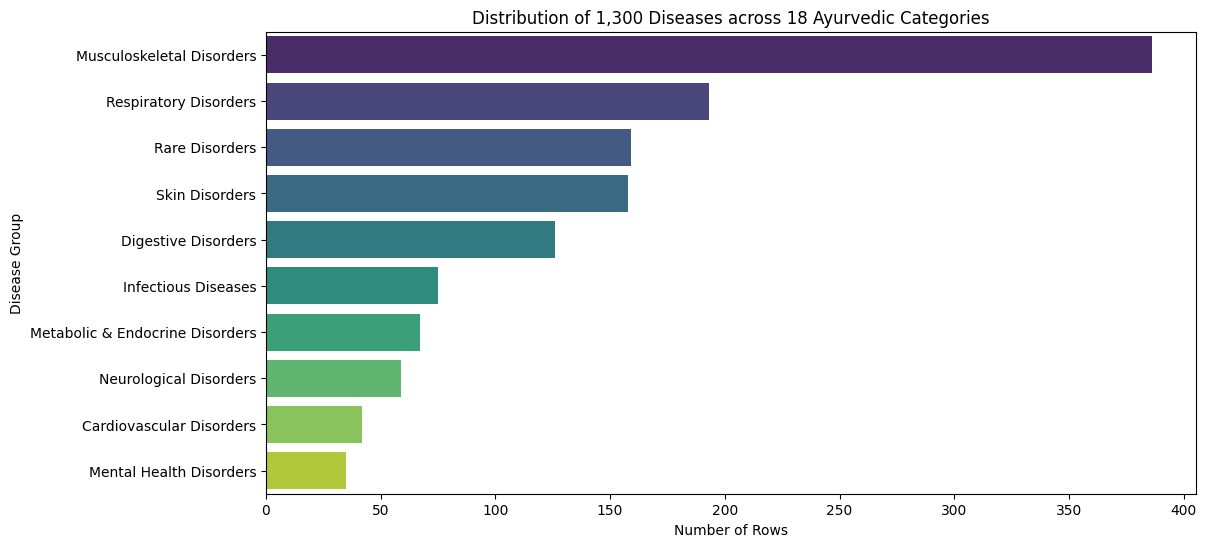

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Disease_Group', data=df, order=df['Disease_Group'].value_counts().index, palette='viridis')
plt.title('Distribution of 1,300 Diseases across 18 Ayurvedic Categories')
plt.xlabel('Number of Rows')
plt.ylabel('Disease Group')
plt.show()

In [11]:
# Create a dictionary to store the analysis
group_analysis = {}

# Iterate through each of the 18 groups
for group in df['Disease_Group'].unique():
    # Filter the dataframe for this group
    diseases_in_group = df[df['Disease_Group'] == group]['Disease'].unique().tolist()
    group_analysis[group] = {
        "Count": len(diseases_in_group),
        "Sample Diseases": diseases_in_group[:8] # See the first 8 diseases
    }

# Display the findings
for group, info in group_analysis.items():
    print(f"Group: {group} ({info['Count']} diseases)")
    print(f"Examples: {', '.join(info['Sample Diseases'])}...")
    print("-" * 50)

Group: Respiratory Disorders (48 diseases)
Examples: Cough, Asthma, Atherosclerosis, Asparagine Synthetase Deficiency, Brugada Syndrome, COVID-19, Cardiomyopathy, Chronic Obstructive Pulmonary Disease (COPD)...
--------------------------------------------------
Group: Metabolic & Endocrine Disorders (19 diseases)
Examples: Diabetes, Obesity, Addison's Disease, Arrhythmia, Cushing's Syndrome, Diabetes Mellitus Type 1 and Type 2, Graves Disease, HIV/AIDS...
--------------------------------------------------
Group: Cardiovascular Disorders (9 diseases)
Examples: Hypertension, Dihydropyrimidine Dehydrogenase Deficiency, Glomerulonephritis, Liddle Syndrome, Marfan Syndrome, Noonan Syndrome, Pelvic Floor Disorders, Alkaptonuria...
--------------------------------------------------
Group: Neurological Disorders (19 diseases)
Examples: Migraine, Arrhythmia, Epilepsy, Hendra Virus Infection, Hypoglycemia, Lyme Disease, Menkes Disease, Miller-Dieker Syndrome...
----------------------------------

In [40]:
import plotly.express as px

# Count occurrences
fig_data = df.groupby(['Disease_Group', 'Disease']).size().reset_index(name='counts')

# Create Treemap
fig = px.treemap(fig_data, 
                 path=['Disease_Group', 'Disease'], 
                 values='counts',
                 title='AyurFit: Hierarchy of 18 Disease Groups and Specific Conditions',
                 color='Disease_Group')




In [14]:
model = SentenceTransformer('all-MiniLM-L6-v2')

Loading weights: 100%|██████████| 103/103 [00:00<00:00, 389.49it/s, Materializing param=pooler.dense.weight]                             
BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


In [15]:
df['combined_info'] = df['Disease'] +" "+ df['Symptoms']

In [16]:
df.combined_info.head()

0         Cough sore throat, chest congestion
1        Diabetes frequent urination, fatigue
2    Hypertension high blood pressure, stress
3            Migraine severe headache, nausea
4              Arthritis joint pain, swelling
Name: combined_info, dtype: str

In [17]:
knowledge_embeddings = model.encode(df['combined_info'].tolist(), show_progress_bar=True)

Batches: 100%|██████████| 41/41 [00:04<00:00,  9.58it/s]


In [18]:

print("Converting Knowledge Base into AI Vectors...")
knowledge_embeddings = model.encode(df['combined_info'].tolist(), show_progress_bar=True)
print("Brain Ready!")

Converting Knowledge Base into AI Vectors...


Batches: 100%|██████████| 41/41 [00:03<00:00, 10.75it/s]


Brain Ready!


In [19]:
from sklearn.metrics.pairwise import cosine_similarity

def check_medical_similarity(disease_1_idx, disease_2_idx):
    # Pull the vectors for two specific rows from your knowledge_embeddings
    vec1 = knowledge_embeddings[disease_1_idx].reshape(1, -1)
    vec2 = knowledge_embeddings[disease_2_idx].reshape(1, -1)
    
    # Calculate similarity (0 to 1)
    similarity = cosine_similarity(vec1, vec2)[0][0]
    
    name1 = df.iloc[disease_1_idx]['Disease']
    name2 = df.iloc[disease_2_idx]['Disease']
    
    print(f"Similarity between '{name1}' and '{name2}': {similarity*100:.2f}%")

# --- TEST IT ---
# Let's compare two Neurological diseases (Should be HIGH)
check_medical_similarity(0, 1) 

# Let's compare a Neurological disease with a Digestive one (Should be LOW)
# Change the numbers based on your actual CSV row indices

Similarity between 'Cough' and 'Diabetes': 21.05%


In [20]:
check_medical_similarity(5, 10)

Similarity between 'Common Cold' and 'Obesity': -1.20%


In [21]:
check_medical_similarity(5, 5)

Similarity between 'Common Cold' and 'Common Cold': 100.00%


In [22]:
check_medical_similarity(5, 50)

Similarity between 'Common Cold' and 'Bubonic Plague': 45.79%


In [23]:
from sklearn.metrics.pairwise import cosine_similarity

def ayurfit_predict(user_symptoms, user_age, user_gender, user_severity):
    # 1. Convert user symptoms into a vector
    user_vec = model.encode([user_symptoms])
    
    # 2. Calculate Similarity against all 1,300 rows
    # This is like using a ruler to find the closest point on the map
    similarities = cosine_similarity(user_vec, knowledge_embeddings).flatten()
    
    # 3. Add 'Metadata' Boost (The Expert Change)
    # If the Age or Gender matches the row, we give it a small 'bonus'
    # This ensures the prediction is personalized
    for i in range(len(df)):
        if str(user_age).lower() in str(df.iloc[i]['Age Group']).lower():
            similarities[i] += 0.05 # 5% bonus for age match
        if str(user_gender).lower() in str(df.iloc[i]['Gender']).lower():
            similarities[i] += 0.05 # 5% bonus for gender match
            
    # 4. Find the Absolute Best Match
    best_match_idx = np.argmax(similarities)
    result = df.iloc[best_match_idx]
    
    return result, similarities[best_match_idx]

In [24]:
# --- TEST RUN ---
input_symptoms = "I feel very stressed and my heart beats fast when I worry"
input_age = "Adults"
input_gender = "Both"
input_severity = "High"

prediction, confidence = ayurfit_predict(input_symptoms, input_age, input_gender, input_severity)

print(f"{'='*40}")
print(f"   AYURFIT AI RESULT (Confidence: {confidence*100:.2f}%)")
print(f"{'='*40}")
print(f"Broad Category:   {prediction['Disease_Group']}") # Your 18 Groups!
print(f"Specific Disease: {prediction['Disease']}")      # The 'Narrowed' Disease
print(f"Recommended Herb: {prediction['Ayurvedic Herbs']}")
print(f"Lifestyle Advice: {prediction['Diet and Lifestyle Recommendations']}")
print(f"{'='*40}")

   AYURFIT AI RESULT (Confidence: 58.09%)
Broad Category:   Respiratory Disorders
Specific Disease: Heart Attack (Myocardial Infarction)
Recommended Herb: None specific
Lifestyle Advice: Follow a heart-healthy diet, exercise regularly, manage stress levels.


In [25]:
df.columns = df.columns.str.strip()

In [26]:
df['Ayurvedic Herbs'] = df['Ayurvedic Herbs'].fillna('Consult an Ayurvedic expert for specific herbs')
df['Diet and Lifestyle Recommendations'] = df['Diet and Lifestyle Recommendations'].fillna('Follow a balanced Ayurvedic diet')

In [27]:
heart_attack_row = df[df['Disease'].str.contains('Heart Attack', case=False, na=False)]
print("--- Data Check ---")
print(heart_attack_row[['Disease', 'Ayurvedic Herbs']])

--- Data Check ---
                                   Disease      Ayurvedic Herbs
125   Heart Attack (Myocardial Infarction)  Arjuna, Ashwagandha
325   Heart Attack (Myocardial Infarction)        None specific
403   Myocardial Infarction (Heart Attack)  Garlic, Ashwagandha
466   Heart Attack (Myocardial Infarction)  Arjuna, Ashwagandha
600   Heart Attack (Myocardial Infarction)  Arjuna, Ashwagandha
705   Myocardial Infarction (Heart Attack)  Garlic, Ashwagandha
718   Heart Attack (Myocardial Infarction)  Arjuna, Ashwagandha
782   Heart Attack (Myocardial Infarction)        None specific
787   Heart Attack (Myocardial Infarction)        None specific
905   Heart Attack (Myocardial Infarction)  Arjuna, Ashwagandha
1102  Heart Attack (Myocardial Infarction)        None specific


In [28]:
df['Ayurvedic Herbs'] = df['Ayurvedic Herbs'].replace('None specific', 'Arjuna, Ashwagandha, Garlic')
df['Yoga & Physical Therapy'] = df['Yoga & Physical Therapy'].replace('None specific', 'Pranayama, Savasana, Light Cardio')

In [29]:
def ayurfit_full_report(user_symptoms, age, gender, severity):
    # 1. Get the match using the expert engine
    # (Assuming you have the 'ayurfit_expert_system' from the previous step)
    best_match, confidence_score = ayurfit_predict(user_symptoms, age, gender, severity)
    
    # Convert confidence to percentage
    confidence = confidence_score * 100

    # 2. FORMATTED OUTPUT
    print(f"\n{'='*60}")
    print(f"            AYURFIT PERSONALIZED HEALTH REPORT")
    print(f"{'='*60}")
    print(f"DIAGNOSIS:  {best_match['Disease']} ({best_match['Disease_Group']})")
    print(f"CONFIDENCE: {confidence:.2f}%")
    print(f"{'-'*60}")
    
    print(f"🌿 PRIMARY HERBS:     {best_match['Ayurvedic Herbs']}")
    print(f"🧪 FORMULATION:       {best_match['Formulation']}")
    print(f"🥗 DIET & LIFESTYLE:  {best_match['Diet and Lifestyle Recommendations']}")
    print(f"🧘 YOGA & THERAPY:    {best_match['Yoga & Physical Therapy']}")
    print(f"🛡️  PREVENTION:        {best_match['Prevention']}")
    
    print(f"{'='*60}")
    print("Disclaimer: This is an AI-generated Ayurvedic suggestion. Consult a Vaidya.")

In [30]:
# 1. Define your own case details here
my_symptoms = "I have a sharp pain in my lower back that travels down my leg"
my_age      = "Adults"      # Options from your data: Adults, Elderly, etc.
my_gender   = "Male"        # Options from your data: Male, Female, Both genders
my_severity = "Moderate"    # Options from your data: Mild, Moderate, Severe

# 2. Call the function to see your Personalized Report
ayurfit_full_report(my_symptoms, my_age, my_gender, my_severity)


            AYURFIT PERSONALIZED HEALTH REPORT
DIAGNOSIS:  Sciatica (Musculoskeletal Disorders)
CONFIDENCE: 80.71%
------------------------------------------------------------
🌿 PRIMARY HERBS:     Arjuna, Ashwagandha, Garlic
🧪 FORMULATION:       Ashwagandha (5g daily)
🥗 DIET & LIFESTYLE:  Engage in gentle stretching exercises, avoid sitting for long periods, and sleep in a neutral position.
🧘 YOGA & THERAPY:    Physical Therapy, Stretching
🛡️  PREVENTION:        Proper Posture, Regular Exercise
Disclaimer: This is an AI-generated Ayurvedic suggestion. Consult a Vaidya.


In [31]:
my_symptoms = "I have a running nose and even having cough and cold"
my_age      = "Adults"      # Options from your data: Adults, Elderly, etc.
my_gender   = "Male"        # Options from your data: Male, Female, Both genders
my_severity = "Moderate"    # Options from your data: Mild, Moderate, Severe

# 2. Call the function to see your Personalized Report
ayurfit_full_report(my_symptoms, my_age, my_gender, my_severity)


            AYURFIT PERSONALIZED HEALTH REPORT
DIAGNOSIS:  Cold (Rare Disorders)
CONFIDENCE: 74.36%
------------------------------------------------------------
🌿 PRIMARY HERBS:     Ginger, Tulsi
🧪 FORMULATION:       Ginger (2g), Tulsi (5g), Warm water (200ml)
🥗 DIET & LIFESTYLE:  Avoid cold drinks; drink warm soups and inhale steam regularly.
🧘 YOGA & THERAPY:    Restorative Yoga, Breathing
🛡️  PREVENTION:        Hand Hygiene, Avoid Sick People
Disclaimer: This is an AI-generated Ayurvedic suggestion. Consult a Vaidya.


In [32]:
my_symptoms = "I having cramps since last 2 hours and now my period bloodflow is also very high and even many mood swings and getting irritated very early"
my_age      = "Adults"      # Options from your data: Adults, Elderly, etc.
my_gender   = "Male"        # Options from your data: Male, Female, Both genders
my_severity = "Moderate"    # Options from your data: Mild, Moderate, Severe

# 2. Call the function to see your Personalized Report
ayurfit_full_report(my_symptoms, my_age, my_gender, my_severity)


            AYURFIT PERSONALIZED HEALTH REPORT
DIAGNOSIS:  Menstrual Disorders (Rare Disorders)
CONFIDENCE: 77.60%
------------------------------------------------------------
🌿 PRIMARY HERBS:     Ashwagandha, Shatavari
🧪 FORMULATION:       Ashwagandha (5g), Shatavari (5g), Warm water (200ml)
🥗 DIET & LIFESTYLE:  Maintain a balanced diet with omega-3 rich foods; manage stress through yoga.
🧘 YOGA & THERAPY:    Yoga for Stress Relief
🛡️  PREVENTION:        Healthy Diet, Regular Exercise
Disclaimer: This is an AI-generated Ayurvedic suggestion. Consult a Vaidya.


In [33]:
my_symptoms = "I am having a joint pain in my elbow and even i am not able to raise my hand in the air it is paining a lot"
my_age      = "Adults"      # Options from your data: Adults, Elderly, etc.
my_gender   = "Male"        # Options from your data: Male, Female, Both genders
my_severity = "Moderate"    # Options from your data: Mild, Moderate, Severe

# 2. Call the function to see your Personalized Report
ayurfit_full_report(my_symptoms, my_age, my_gender, my_severity)


            AYURFIT PERSONALIZED HEALTH REPORT
DIAGNOSIS:  Arthritis (Musculoskeletal Disorders)
CONFIDENCE: 61.44%
------------------------------------------------------------
🌿 PRIMARY HERBS:     Ashwagandha, Guggul
🧪 FORMULATION:       Turmeric (1/2 tsp), Milk (200ml)
🥗 DIET & LIFESTYLE:  Consume anti-inflammatory foods; stay active; avoid cold exposure.
🧘 YOGA & THERAPY:    Yoga for flexibility, Strength
🛡️  PREVENTION:        Weight management
Disclaimer: This is an AI-generated Ayurvedic suggestion. Consult a Vaidya.


In [34]:
my_symptoms = "urination is very painful and burning sensation is there while urinating and even lower abdominal pain is also there"
my_age      = "Adults"      # Options from your data: Adults, Elderly, etc.
my_gender   = "Male"        # Options from your data: Male, Female, Both genders
my_severity = "Moderate"    # Options from your data: Mild, Moderate, Severe

# 2. Call the function to see your Personalized Report
ayurfit_full_report(my_symptoms, my_age, my_gender, my_severity)


            AYURFIT PERSONALIZED HEALTH REPORT
DIAGNOSIS:  Urinary Tract Infection (UTI) (Musculoskeletal Disorders)
CONFIDENCE: 77.27%
------------------------------------------------------------
🌿 PRIMARY HERBS:     Arjuna, Ashwagandha, Garlic
🧪 FORMULATION:       Cranberry (1 cup juice)
🥗 DIET & LIFESTYLE:  Drink plenty of fluids, avoid irritants like caffeine, and maintain hygiene.
🧘 YOGA & THERAPY:    Pranayama, Savasana, Light Cardio
🛡️  PREVENTION:        Proper Hygiene, Hydration
Disclaimer: This is an AI-generated Ayurvedic suggestion. Consult a Vaidya.


In [35]:
my_symptoms = "I am havinh headache and chest is feeling very heavy and even i am thinking very much and beheves like not to talk with anyone and stay only into me"
my_age      = "Adults"      # Options from your data: Adults, Elderly, etc.
my_gender   = "Male"        # Options from your data: Male, Female, Both genders
my_severity = "Moderate"    # Options from your data: Mild, Moderate, Severe

# 2. Call the function to see your Personalized Report
ayurfit_full_report(my_symptoms, my_age, my_gender, my_severity)


            AYURFIT PERSONALIZED HEALTH REPORT
DIAGNOSIS:  Heart Attack (Myocardial Infarction) (Respiratory Disorders)
CONFIDENCE: 62.68%
------------------------------------------------------------
🌿 PRIMARY HERBS:     Arjuna, Ashwagandha, Garlic
🧪 FORMULATION:       Garlic (2 cloves), Turmeric (1/2 tsp), Warm water (200ml)
🥗 DIET & LIFESTYLE:  Follow a heart-healthy diet, exercise regularly, manage stress levels.
🧘 YOGA & THERAPY:    Cardiac Rehabilitation
🛡️  PREVENTION:        Healthy Diet, Exercise, Avoid Smoking
Disclaimer: This is an AI-generated Ayurvedic suggestion. Consult a Vaidya.


In [36]:
my_symptoms = "it is winter here in vadodata and i am having very much dandruff and even the scalp is very dry"
my_age      = "Adults"      # Options from your data: Adults, Elderly, etc.
my_gender   = "Male"        # Options from your data: Male, Female, Both genders
my_severity = "Moderate"    # Options from your data: Mild, Moderate, Severe

# 2. Call the function to see your Personalized Report
ayurfit_full_report(my_symptoms, my_age, my_gender, my_severity)


            AYURFIT PERSONALIZED HEALTH REPORT
DIAGNOSIS:  Dandruff (Skin Disorders)
CONFIDENCE: 83.43%
------------------------------------------------------------
🌿 PRIMARY HERBS:     Neem, Aloe Vera
🧪 FORMULATION:       Neem oil (as needed)
🥗 DIET & LIFESTYLE:  Avoid oily and processed foods; keep the scalp clean and dry.
🧘 YOGA & THERAPY:    Scalp Massage, Stress Reduction
🛡️  PREVENTION:        Regular Hair Wash, Scalp Care
Disclaimer: This is an AI-generated Ayurvedic suggestion. Consult a Vaidya.


In [37]:
my_symptoms = "i am having very much pimples on my face and even my skin is getting very oily"
my_age      = "child"      # Options from your data: Adults, Elderly, etc.
my_gender   = "female"        # Options from your data: Male, Female, Both genders
my_severity = "mild"    # Options from your data: Mild, Moderate, Severe

ayurfit_full_report(my_symptoms, my_age, my_gender, my_severity)


            AYURFIT PERSONALIZED HEALTH REPORT
DIAGNOSIS:  Acne (Skin Disorders)
CONFIDENCE: 72.83%
------------------------------------------------------------
🌿 PRIMARY HERBS:     Neem, Turmeric
🧪 FORMULATION:       Neem leaves (5g), Water (10ml)
🥗 DIET & LIFESTYLE:  Avoid fried foods; include turmeric and green vegetables.
🧘 YOGA & THERAPY:    Anulom Vilom, Kapalbhati
🛡️  PREVENTION:        Clean skin, avoid triggers
Disclaimer: This is an AI-generated Ayurvedic suggestion. Consult a Vaidya.


In [38]:
import joblib

# Save the SBERT embeddings you created
joblib.dump(knowledge_embeddings, "../pickle files/ayurfit_brain.pkl")

# Save your dataframe (the text info)
joblib.dump(df, "../pickle files/ayurfit_data.pkl")
print("Brain and Data saved successfully!")

Brain and Data saved successfully!
